# Charting Data 

## Pulling Data From Website

In [1]:
import numpy as np
import pandas as pd 
import requests
import json

data = {
    'filters': 'taxnodes:Technology|Information Technology|Artificial Intelligence|Cognitive Science@@semantic-units:arXiv.org',
    'fields': 'concept-tagsConf,cdid,taxnodesConf,modified,authorsRaw,title',
    'sort': 'title_sort asc',
    'limit': 2000,
    'offset': 0
}

response = requests.post('https://aitopics.org/i2kweb/webapi/search', data=data, auth=('aitopics-guest', 'HvGSauJ00COgRnGX'))

response_data = response.json()

## Strips the Unneeded Strings from Tags

In [2]:
def format_tag(tag):
    end = tag.find('::')
    return (tag[0:end])

tag_count = {}

for article in response_data:
    tags = article.get('concept-tagsConf')
    
    for tag in tags or []:
        tag = format_tag(tag)

        if tag in tag_count:
            tag_count[tag] += 1
        else:
            tag_count[tag] = 1

## Converts the Dictionary to a List of Dictionary 

In [3]:
to_list = []

for key, value in tag_count.items():
    temp = {}
    temp['Name'] = key
    temp['Occurances'] = value
    to_list.append(temp)

dataFrame = pd.DataFrame(to_list)
dataFrame

,Name,Occurances
0,diagnostic medicine,64
1,machine learning,1736
2,consumer health,55
3,natural language,423
4,artificial intelligence,1984
...,...,...
14572,observation signal,1
14573,deep trace generator,1
14574,trace conditioning problem,1
14575,deep trace feature,1


## Getting the Top `n` Largest Values and Plots Them

<AxesSubplot:xlabel='Name'>

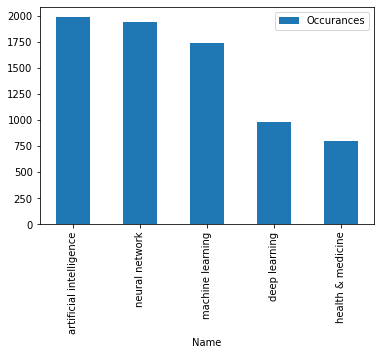

In [4]:
dataFrame.nlargest(5, ['Occurances']).plot.bar(x='Name', y='Occurances')

# Questions about Data Structures

## The Strings after the Tags
Each set of data gets returned with these numbers after the tag. It is very easy to remove them because you remove everything after `::` but is there a way to do this where we don't have to loop over the entire data set and remove things like this? 

## Not having to Manipulate the Data with Python

In [6]:
responseData = pd.DataFrame(response_data)

list

When converting it to a *Data Frame* there is also the issue of each subcatagory having multiple values listed. I looked into nesting *Data Frames* but I saw some responses saying things along the lines of that is not optimal because it will use `python` code to go through values instead of the `C` code. I also saw something called `MultiIndex` but I did not try it out yet. 

## Things I need to try

- Removing the unneeded strings using pandas instead of python
- Try `MultiIndex` for multilayered indexing 

Plot of time on the `x` axis and count of occurances of the top 4 tags 

how many occances of tags per week 
functions for grouping by week (`groupby` & `aggrugate`) 

---

Liner regression 